Index(['timestamp', 'distance'], dtype='object')


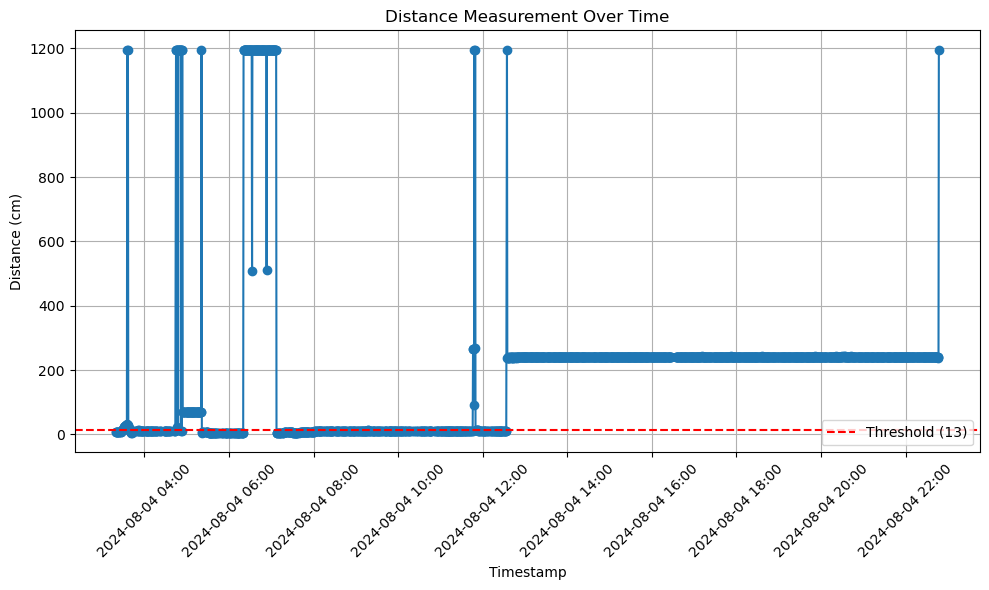

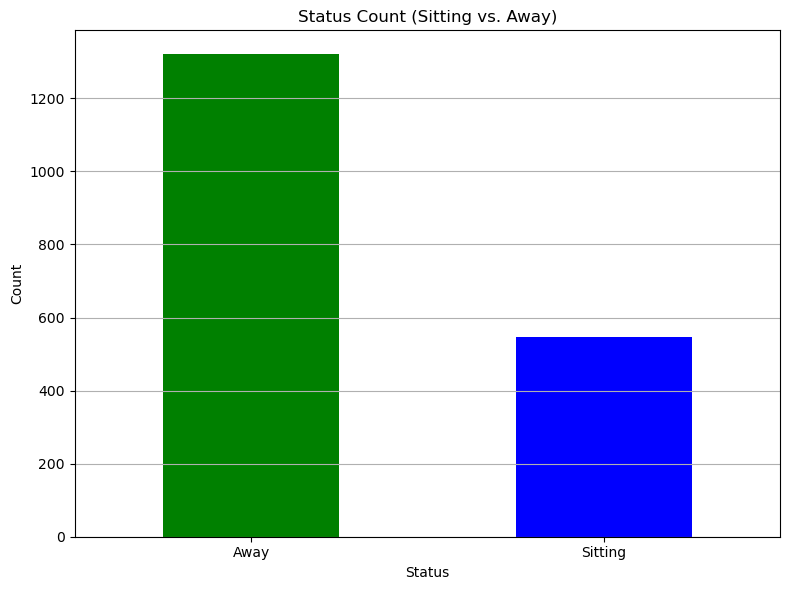

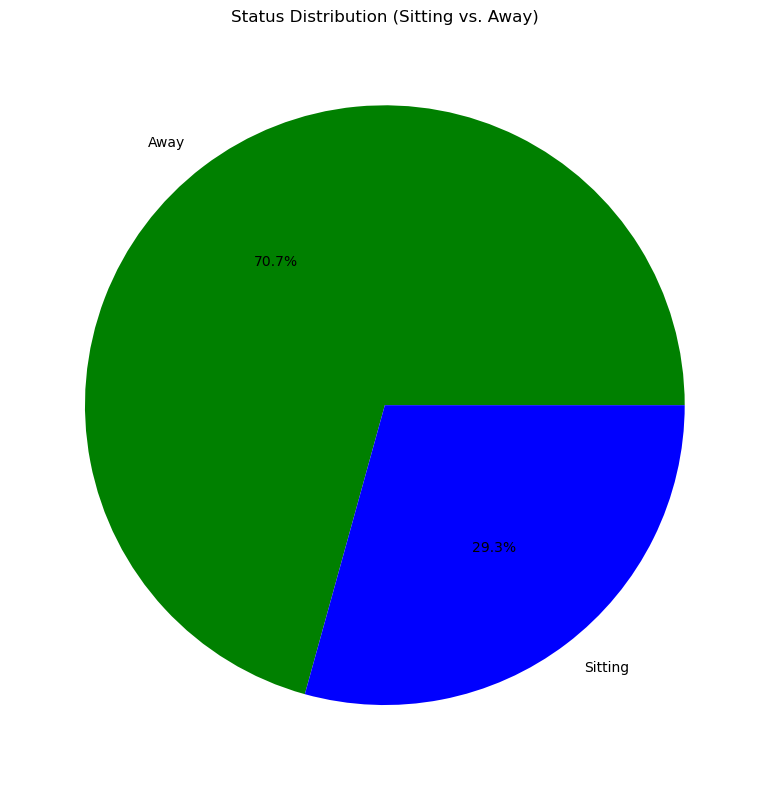

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
df = pd.read_csv('distance_data.csv')

# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Print the column names to check if they are as expected
print(df.columns)

# Add a new column to indicate if someone is sitting at the desk or away
if 'distance' in df.columns:
    df['status'] = df['distance'].apply(lambda x: 'Sitting' if x < 13 else 'Away')
else:
    print("Column 'distance' not found in the DataFrame.")
    print("Available columns are:", df.columns)

# If 'distance' column is present, proceed with plotting
if 'distance' in df.columns:
    # Line plot of distance over time
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['distance'], marker='o')
    plt.axhline(y=13, color='r', linestyle='--', label='Threshold (13)')
    plt.xlabel('Timestamp')
    plt.ylabel('Distance (cm)')
    plt.title('Distance Measurement Over Time')
    plt.xticks(rotation=45)

    # Set the major locator to show time every 2 hours
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Bar chart of status counts
    status_counts = df['status'].value_counts()
    plt.figure(figsize=(8, 6))
    status_counts.plot(kind='bar', color=['green', 'blue'])
    plt.xlabel('Status')
    plt.ylabel('Count')
    plt.title('Status Count (Sitting vs. Away)')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Pie chart of status distribution
    plt.figure(figsize=(8, 8))
    status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'blue'])
    plt.ylabel('')
    plt.title('Status Distribution (Sitting vs. Away)')
    plt.tight_layout()
    plt.show()
